# I-94 TRAFFIC DATASET

[Dataset url](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  
[More information](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  


## Attribute information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Examine the first five rows
print(traffic.head())

# Examine the last five rows
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [2]:
# Information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns  
There is no null values at all  
Time period: from 2012-10-02 09:00:00 to 2018-09-30 23:00:00

## Analyzing Traffic Volume

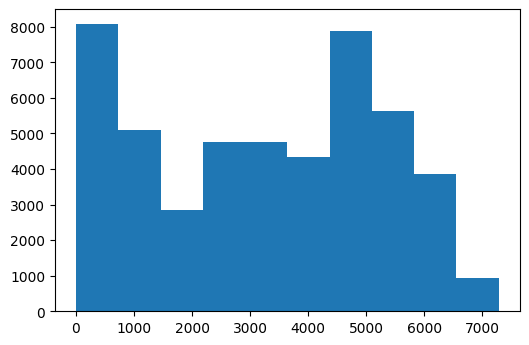

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic['traffic_volume'])
plt.show()

In [4]:
# a few statistics about the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- The traffic volume ranges from 0 to 7280 cars with an average of 3259.8
- Because mean and 50% are almost equal so, **in one day, the amount of traffic at peak times can be 4 times higher than normal**
- Daytime and nighttime might influence the traffic volume

## Traffic Volume: Day vs .Night

In [5]:
# Transform the date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [6]:
import datetime as dt

traffic['hour'] = traffic['date_time'].dt.hour
traffic['month'] = traffic['date_time'].dt.month
traffic['year'] = traffic['date_time'].dt.year
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek

- 4 new columns are added by splitting information of the date_time column

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
 10  month                48204 non-null  int64         
 11  year                 48204 non-null  int64         
 12  day_of_week          48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3

- Let divide the dataset by day and night, each part lasts 12 hours:
    - daytime starts from 7 a.m to 6 p.m
    - nighttime starts from 7 p.m to 6 a.m of next day

In [8]:
traffic_day = traffic.loc[(traffic['hour'] >= 7) & (traffic['hour'] <= 18)]
traffic_night = traffic.loc[(traffic['hour'] >=  19) | (traffic['hour'] <= 6)]

In [9]:
print("Shape of daytime dataset:", traffic_day.shape)
print("Shape of nighttiem dataset:",traffic_night.shape)

Shape of daytime dataset: (23877, 13)
Shape of nighttiem dataset: (24327, 13)


- The number of rows of the two dataframe is not equal. This is unusual because both of dataset has 12 hours.
- **Maybe some data is missing**

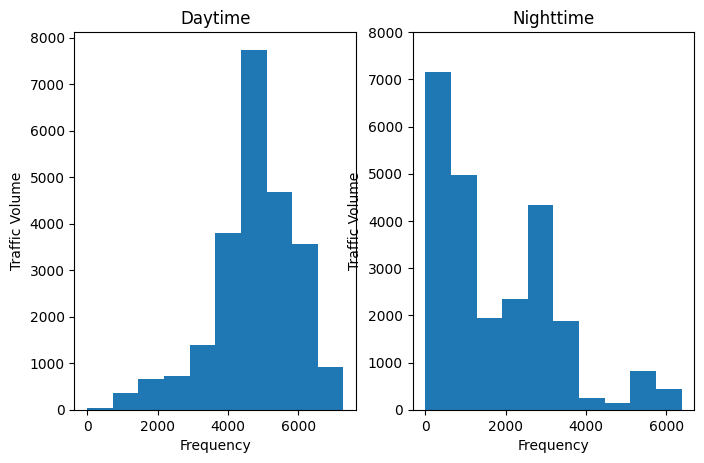

In [10]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.title('Daytime')
plt.xlabel('Frequency')
plt.ylabel('Traffic Volume')
plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.xlabel('Frequency')
plt.ylabel('Traffic Volume')
plt.title('Nighttime')
plt.ylim(bottom=0, top=8000)
plt.show()


- Daytime traffic is higher than nighttime. Regularly reaching the milestone of approximately 5.000 cars
- Nighttime traffic usually has less than 1.000 - 1.500 cars on the road
- Daytime hist has likely symmetrical distribution
- Nighttime hist has right skewed distribution

In [11]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- Focus on values of 25%, 50%, and 75% of both dataset:
    - In daytime, the traffic volume is distributed fairly evenly for all hours. That is, there is always an equal number of cars on the road
    - In nighttime, the traffic volumn is distributed is unevenly. There are sudden changes at times
- The traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward

## Time Indicators

In [13]:
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

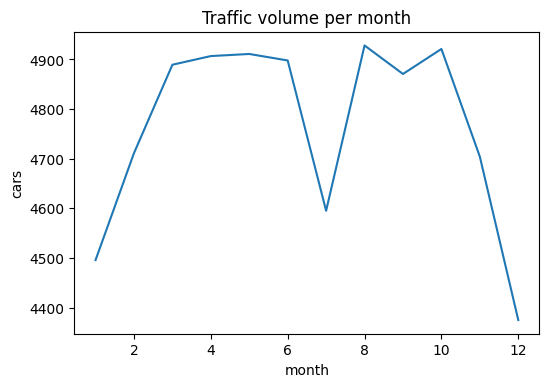

In [14]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic volume per month')
plt.ylabel('cars')
plt.show()

- There was a sudden decrease in vehicle traffic starting in July. 
- **Focusing on the data analysis for the month of July.**

In [15]:
by_dayofweek = traffic_day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

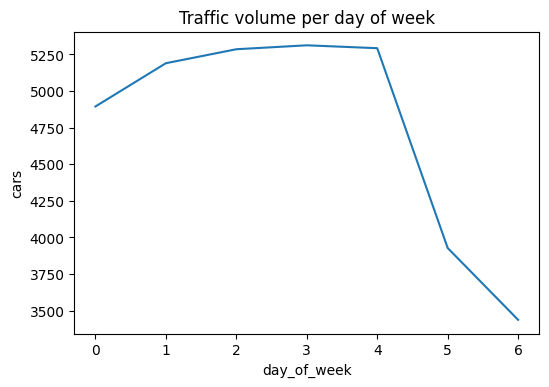

In [16]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic volume per day of week')
plt.ylabel('cars')
plt.show()

- The traffic volume is significantly heavier on business days compared to the weekends
- The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend

In [17]:
traffic_day['date_time'].dt.hour
bussiness_days = traffic_day.copy()[traffic_day['day_of_week'] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

- We split the dataset so we can focus on plotting the graphs by bussiness and weekend day

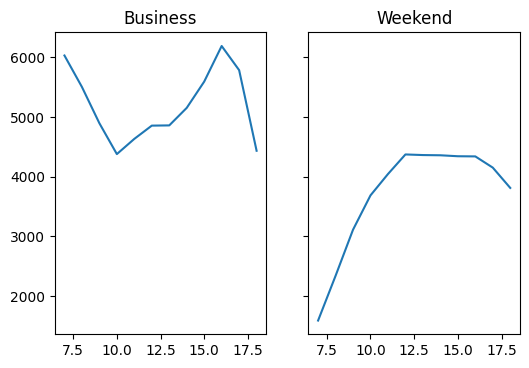

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey=True)
ax1.set_title('Business')
ax2.set_title('Weekend')
ax1.plot(by_hour_business['traffic_volume'])
ax2.plot(by_hour_weekend['traffic_volume'])
plt.show()

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.

## Weather Indicators

In [19]:
traffic.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

All correlation between traffic_volume and the numerical weather column are low so we didn't find any reliable indicator of heavy traffic

## Weahter Types

In [20]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

In [21]:
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,day_of_week
weather_description,,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,14.000000,7.000000,2016.000000,2.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,12.453052,7.557512,2014.723005,2.895540
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,12.811314,6.675260,2015.266380,2.998210
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,11.697842,7.244604,2015.762590,3.028777
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,12.633421,6.159230,2015.139983,2.977253


In [22]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,day_of_week
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248,6.490599,2015.619429,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974,6.393243,2015.321420,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041,7.105323,2015.882220,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2015.814917,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2015.557554,2.754197


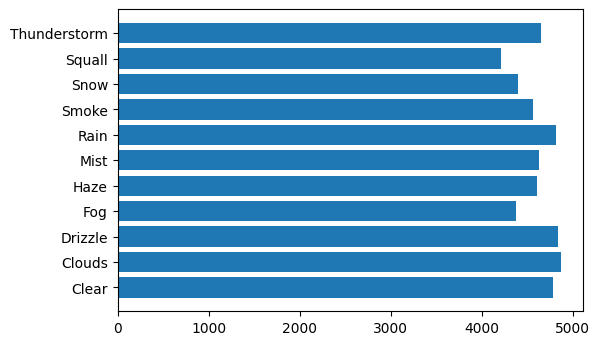

In [23]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.show()

All weather type  have pretty similar traffic volume. There is no traffic volume exceeding 5,000 cars. 

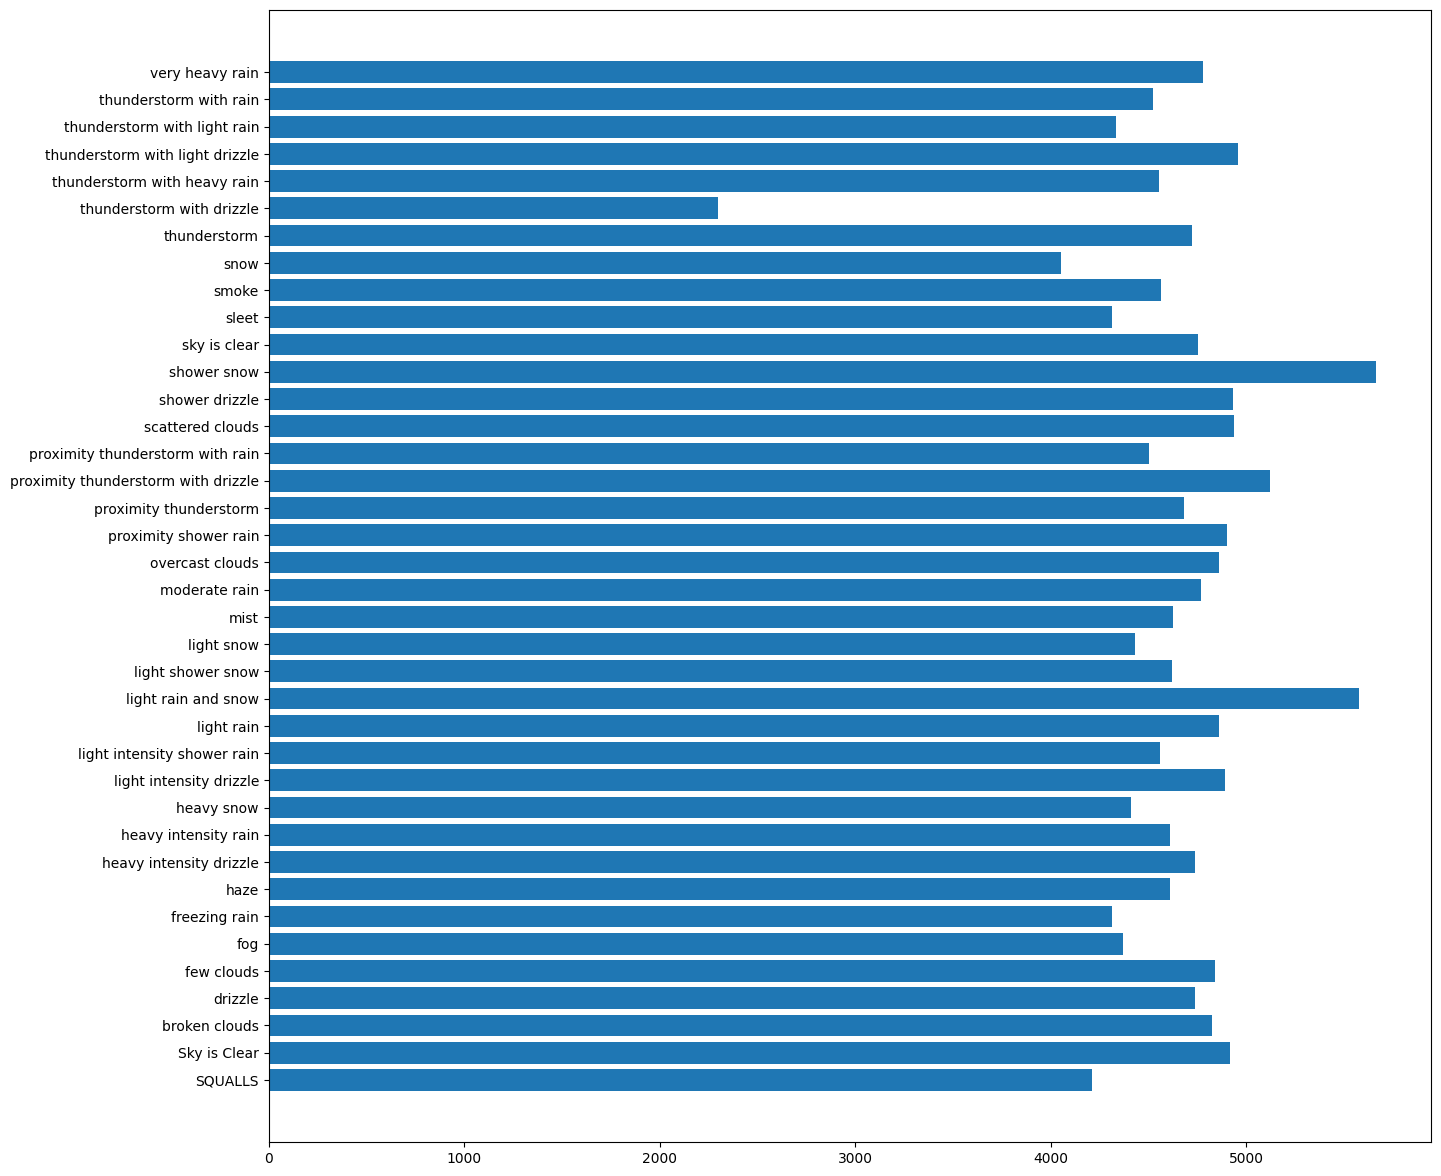

In [27]:
plt.figure(figsize=(15,15))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.show()

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 - The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle